In [9]:
from IPython.display import Image
import numpy as np
import matplotlib.pyplot as plt

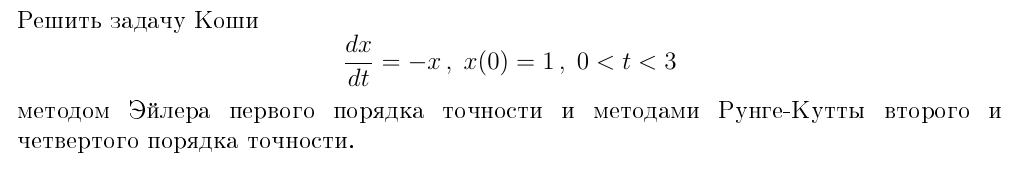

In [10]:
Image('task 6.png')

In [11]:
f = lambda x: -x
solution = lambda t: np.exp(-t)

In [12]:
def Euler(x0, t0, step, count):
    x = [x0]
    t = [t0]
    for i in range(count):
        x.append(x[i] + step * f(x[i]))
        t.append(t0 + step * (i+1))
    return x, t

In [13]:
def RK2(x0, t0, step, count, coef):
    x = [x0]
    t = [t0]
    for i in range(count):
        x.append(x[i] + step * ((1 - coef) * f(x[i]) +
                                coef * f(x[i] + step * f(x[i]) / (2 * coef))))
        t.append(t0 + step * (i+1))
    return x, t

In [14]:
def RK4(x0, t0, step, count):
    x = [x0]
    t = [t0]
    for i in range(count):
        k1 = f(x[i])
        k2 = f(x[i] + step * k1 / 2)
        k3 = f(x[i] + step * k2 / 2)
        k4 = f(x[i] + step * k3)
        x.append(x[i] + step / 6 * (k1 + 2 * k2 + 2 * k3 + k4))
        t.append(t0 + step * (i+1))
    return x, t

In [15]:
a = 0
b = 3

x_0 = 1
t_0 = 0

N = 5
h = (b-a)/N

alpha = 3./4

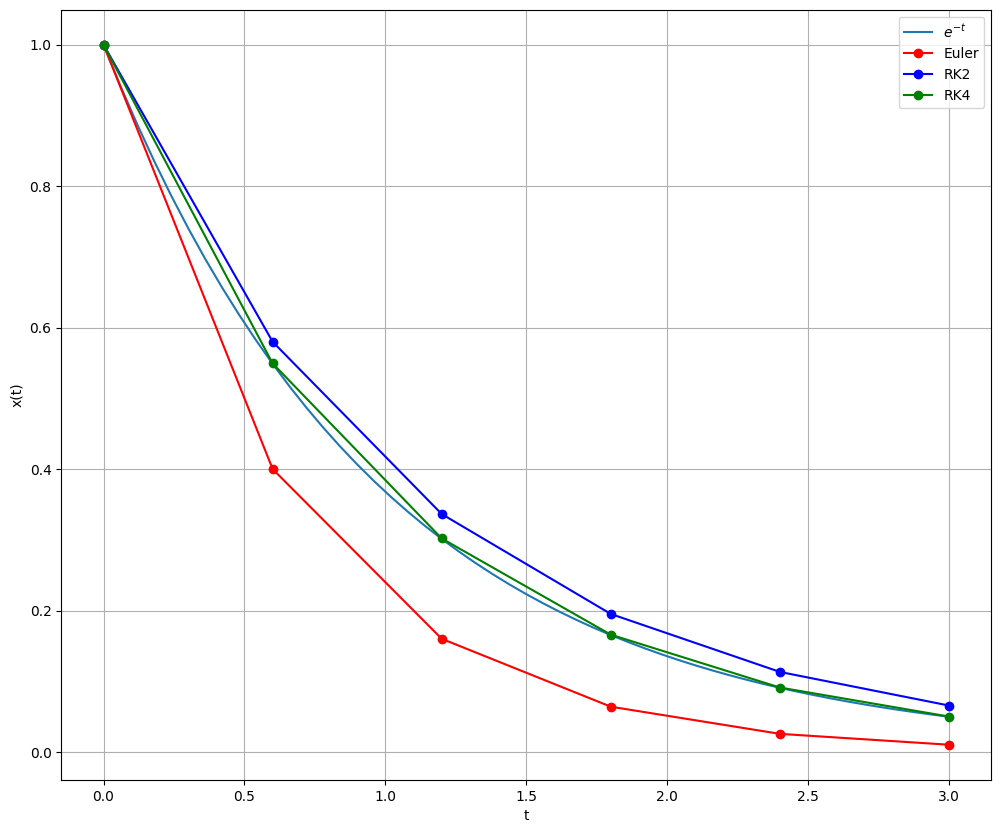

In [19]:
M = 50
T = np.linspace(a, b, M+1)
X = solution(T)

sols = [Euler(x_0, t_0, h, N),
        RK2(x_0, t_0, h, N, alpha),
        RK4(x_0, t_0, h, N)]
labels = ['Euler', 'RK2', 'RK4']
colors = ['ro-', 'bo-', 'go-']

plt.figure(figsize=(12, 10))
plt.plot(T, X, label='$e^{-t}$')
for i in range(3):
    plt.plot(sols[i][1], sols[i][0],
             colors[i], label=labels[i])

plt.legend(loc=1)
plt.xlabel('t')
plt.ylabel('x(t)')
plt.grid()
plt.show()